In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("planetary_systems.csv", sep=',',comment='#', low_memory=False)
print("Original Shape:", df.shape)
df.head()

Original Shape: (39212, 289)


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,default_flag,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,1,...,2023-09-19,2023-08,2023-09-19,2.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2014-05-14,2008-01,2014-05-14,2.0,1.0,2.0,0.0,0.0,0.0,0.0
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2014-07-23,2011-08,2014-07-23,2.0,1.0,2.0,0.0,0.0,0.0,0.0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,0,...,2018-04-25,2009-10,2014-05-14,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,1,...,2018-09-04,2017-03,2018-09-06,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3667 entries, 0 to 3666
Columns: 289 entries, rowid to pl_ndispec
dtypes: float64(254), int64(7), object(28)
memory usage: 8.1+ MB


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,default_flag,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
count,3667.000000,3667,3667,3667,2102,2204,3656,3640,3640,3667.000000,...,3656,3656,3656,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
unique,NaN,1191,885,7,538,533,881,872,872,NaN,...,346,275,347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,HD 209458 b,55 Cnc,b,HD 75732,HIP 43587,TIC 332064670,Gaia DR2 704967037090946688,Gaia DR3 704967037090946688,NaN,...,2018-04-25,2017-07,2014-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,23,61,2919,61,61,61,61,61,NaN,...,311,247,288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1834.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.324516,...,NaN,NaN,NaN,1.059081,2.179705,1.315098,1.007385,0.463895,0.851204,0.012035
std,1058.716046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.468258,...,NaN,NaN,NaN,1.474381,7.406747,2.129912,2.197424,2.111349,3.755199,0.226476
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,917.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1834.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2750.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000


In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])
df.isnull().sum()


,0
rowid,0
pl_name,0
hostname,0
pl_letter,0
hd_name,0
...,...
st_nrvc,0
st_nspec,0
pl_nespec,0
pl_ntranspec,0


In [ ]:
for col in cat_cols:
    df[col] = df[col].str.lower().str.strip()

df[cat_cols].head()

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,discoverymethod,disc_refname,...,pl_tsystemref,st_refname,st_spectype,st_metratio,sy_refname,rastr,decstr,rowupdate,pl_pubdate,releasedate
0,11 com b,11 com,b,hd 107383,hip 60202,tic 72437047,gaia dr2 3946945413106333696,gaia dr3 3946945413106333696,radial velocity,<a refstr=liu_et_al__2008 href=https://ui.adsa...,...,jd,<a refstr=teng_et_al__2023 href=https://ui.ads...,g8 iii,[fe/h],<a refstr=stassun_et_al__2019 href=https://ui....,12h20m42.91s,+17d47m35.71s,2023-09-19,2023-08,2023-09-19
1,11 com b,11 com,b,hd 107383,hip 60202,tic 72437047,gaia dr2 3946945413106333696,gaia dr3 3946945413106333696,radial velocity,<a refstr=liu_et_al__2008 href=https://ui.adsa...,...,bjd,<a refstr=liu_et_al__2008 href=https://ui.adsa...,g8 iii,[fe/h],<a refstr=stassun_et_al__2019 href=https://ui....,12h20m42.91s,+17d47m35.71s,2014-05-14,2008-01,2014-05-14
2,11 com b,11 com,b,hd 107383,hip 60202,tic 72437047,gaia dr2 3946945413106333696,gaia dr3 3946945413106333696,radial velocity,<a refstr=liu_et_al__2008 href=https://ui.adsa...,...,bjd,<a refstr=kunitomo_et_al__2011 href=https://ui...,g0 v,[fe/h],<a refstr=stassun_et_al__2019 href=https://ui....,12h20m42.91s,+17d47m35.71s,2014-07-23,2011-08,2014-07-23
3,11 umi b,11 umi,b,hd 136726,hip 74793,tic 230061010,gaia dr2 1696798367260229376,gaia dr3 1696798367260229376,radial velocity,<a refstr=dollinger_et_al__2009 href=https://u...,...,bjd,<a refstr=dollinger_et_al__2009 href=https://u...,k4 iii,[fe/h],<a refstr=stassun_et_al__2019 href=https://ui....,15h17m05.90s,+71d49m26.19s,2018-04-25,2009-10,2014-05-14
4,11 umi b,11 umi,b,hd 136726,hip 74793,tic 230061010,gaia dr2 1696798367260229376,gaia dr3 1696798367260229376,radial velocity,<a refstr=dollinger_et_al__2009 href=https://u...,...,bjd,<a refstr=stassun_et_al__2017 href=https://ui....,g0 v,[fe/h],<a refstr=stassun_et_al__2019 href=https://ui....,15h17m05.90s,+71d49m26.19s,2018-09-04,2017-03,2018-09-06


In [ ]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print(df.shape)
df.head()

(39212, 42821)


,rowid,default_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,disc_year,rv_flag,pul_flag,ptv_flag,...,releasedate_2025-09-17,releasedate_2025-09-25,releasedate_2025-10-02,releasedate_2025-10-09,releasedate_2025-10-30,releasedate_2025-11-13,releasedate_2025-11-20,releasedate_2025-12-04,releasedate_2025-12-11,releasedate_2025-12-18
0,1,1,2,1,0,0,2007,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2,0,2,1,0,0,2007,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,3,0,2,1,0,0,2007,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,4,0,1,1,0,0,2009,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,5,1,1,1,0,0,2009,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
current_num_cols = df.select_dtypes(include=[np.number, bool]).columns

for col in current_num_cols:
    if df[col].dtype == 'bool':
        continue

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    if IQR > 0:
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Shape after winsorization (clipping) of outliers:", df.shape)

Shape after winsorization (clipping) of outliers: (39212, 42821)


In [ ]:
df["Habitability_Score"] = (
    (1 / (abs(df["pl_eqt"] - 288) + 1)) +
    (1 / (df["pl_radj"] + 1)) +
    (1 / (df["pl_bmassj"] + 1))
)

df["Stellar_Compatibility"] = (
    (1 / (df["st_teff"] + 1)) +
    (1 / (df["st_rad"] + 1))
)

df[["Habitability_Score","Stellar_Compatibility"]].head()

/tmp/ipython-input-366615498.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Habitability_Score"] = (
/tmp/ipython-input-366615498.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Stellar_Compatibility"] = (


,Habitability_Score,Stellar_Compatibility
0,0.686276,0.355111
1,0.686276,0.355117
2,0.686276,0.478398
3,0.686276,0.355136
4,0.686276,0.355143


In [ ]:
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].describe()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


,rowid,default_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,disc_year,rv_flag,pul_flag,ptv_flag,...,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
count,3667.000000,3667.000000,3667.000000,3667.000000,3667.0,3667.000000,3667.000000,3667.000000,3667.0,3667.0,...,3667.000000,0.0,0.0,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.00000
mean,0.500000,0.324516,0.110717,0.260158,0.0,0.004091,0.573384,0.942460,0.0,0.0,...,0.425305,NaN,NaN,0.205400,0.299591,0.227707,0.242596,0.024342,0.026520,0.00200
std,0.288793,0.468258,0.244162,0.353630,0.0,0.063835,0.229476,0.232904,0.0,0.0,...,0.080495,NaN,NaN,0.271512,0.289642,0.319875,0.381725,0.110965,0.117183,0.03769
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.250000,0.000000,0.000000,0.000000,0.0,0.000000,0.400000,1.000000,0.0,0.0,...,0.419627,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.566667,1.000000,0.0,0.0,...,0.419627,NaN,NaN,0.200000,0.400000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.750000,1.000000,0.000000,0.400000,0.0,0.000000,0.766667,1.000000,0.0,0.0,...,0.419627,NaN,NaN,0.400000,0.400000,0.400000,0.400000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,...,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


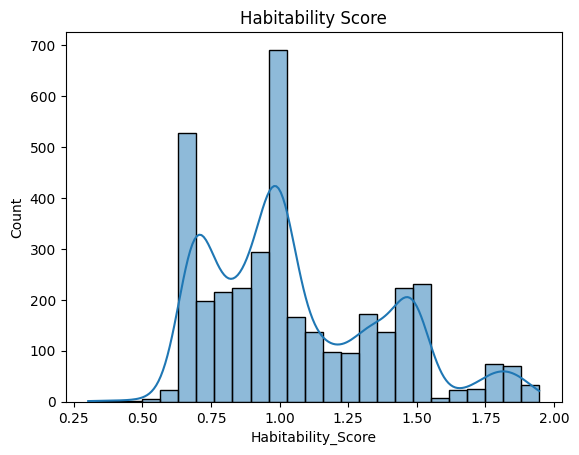

In [ ]:
sns.histplot(df["Habitability_Score"], kde=True)
plt.title("Habitability Score")
plt.show()

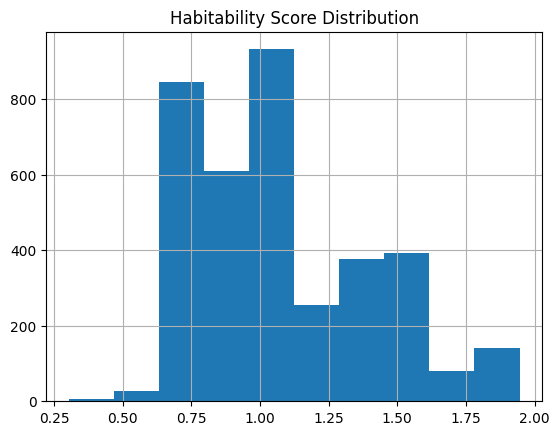

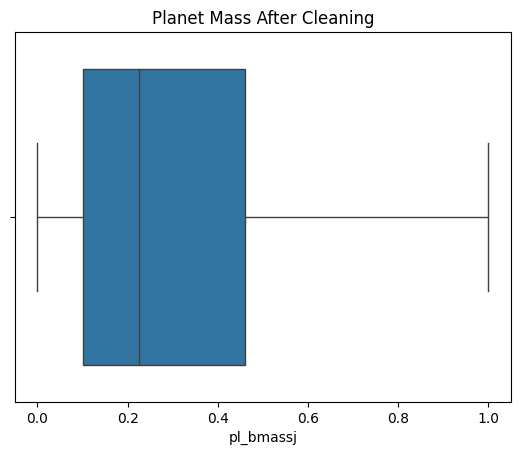

In [ ]:
plt.figure()
df["Habitability_Score"].hist()
plt.title("Habitability Score Distribution")
plt.show()

plt.figure()
sns.boxplot(x=df["pl_bmassj"])
plt.title("Planet Mass After Cleaning")
plt.show()

In [ ]:
completeness = (df.notnull().sum() / len(df)) * 100

# Valid numeric values check
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns
valid_numeric = df[numeric_cols].apply(lambda x: x.notnull() & np.isfinite(x)).mean() * 100

# Overall quality score
quality_score = (completeness.mean() + valid_numeric.mean()) / 2

print("Completeness Check:")
print(completeness)
print("Average Completeness:", round(completeness.mean(),2), "%")
print("Valid Numeric Values:", round(valid_numeric.mean(),2), "%")
print("Overall Data Quality Score:", round(quality_score,2), "%")


Completeness Check:
rowid                     100.0
default_flag              100.0
sy_snum                   100.0
sy_pnum                   100.0
sy_mnum                   100.0
                          ...  
releasedate_2025-12-04    100.0
releasedate_2025-12-11    100.0
releasedate_2025-12-18    100.0
Habitability_Score        100.0
Stellar_Compatibility     100.0
Length: 11709, dtype: float64
Average Completeness: 99.96 %
Valid Numeric Values: 98.1 %
Overall Data Quality Score: 99.03 %


In [ ]:
df.to_csv("/cleaned_exoplanet_data.csv", index=False)
print("cleaned_exoplanet_data.csv")

cleaned_exoplanet_data.csv
